In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [26]:
columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','Category']

In [27]:
df=pd.read_csv('sonar_dataset.csv',names=columns, header=0)

In [28]:
df

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Category
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [30]:
df.Category.unique()

array(['R', 'M'], dtype=object)

In [31]:
df.Category.value_counts()

M    111
R     96
Name: Category, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [34]:
df

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Category
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
1           207 non-null float64
2           207 non-null float64
3           207 non-null float64
4           207 non-null float64
5           207 non-null float64
6           207 non-null float64
7           207 non-null float64
8           207 non-null float64
9           207 non-null float64
10          207 non-null float64
11          207 non-null float64
12          207 non-null float64
13          207 non-null float64
14          207 non-null float64
15          207 non-null float64
16          207 non-null float64
17          207 non-null float64
18          207 non-null float64
19          207 non-null float64
20          207 non-null float64
21          207 non-null float64
22          207 non-null float64
23          207 non-null float64
24          207 non-null float64
25          207 non-null float64
26          207 non-null float64
27          207 non-null float64
28  

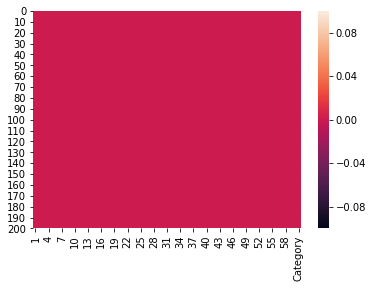

In [36]:
sns.heatmap(df.isnull())

In [37]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Category
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523,0.463768
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038,0.499894
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100,0.000000
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300,0.000000
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [38]:
dfcor = df.corr()
dfcor

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Category
1,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302,-0.270482
2,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010,-0.231670
3,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256,-0.192589
4,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262,-0.247935
5,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220,-0.224809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.319663,0.282822,0.383945,0.349411,0.218004,0.163433,0.183382,0.266743,0.186347,0.141211,...,0.202905,0.315943,0.358746,0.392768,0.509056,1.000000,0.513086,0.433130,0.295369,-0.010152
58,0.368413,0.353061,0.334122,0.345537,0.238749,0.204027,0.242632,0.287568,0.232078,0.212272,...,0.310989,0.371290,0.404345,0.503677,0.465640,0.513086,1.000000,0.550223,0.330400,-0.185066
59,0.357611,0.352260,0.425100,0.421410,0.290793,0.220678,0.183279,0.194209,0.096662,0.058260,...,0.300562,0.346915,0.447086,0.454032,0.431902,0.433130,0.550223,1.000000,0.644140,-0.132088
60,0.346302,0.359010,0.374256,0.399262,0.255220,0.178027,0.224536,0.147350,0.099233,0.097528,...,0.192609,0.279412,0.286259,0.263791,0.356433,0.295369,0.330400,0.644140,1.000000,-0.086982


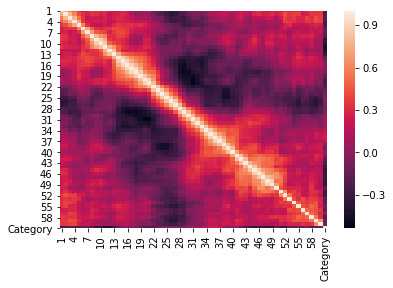

In [39]:
sns.heatmap(dfcor)

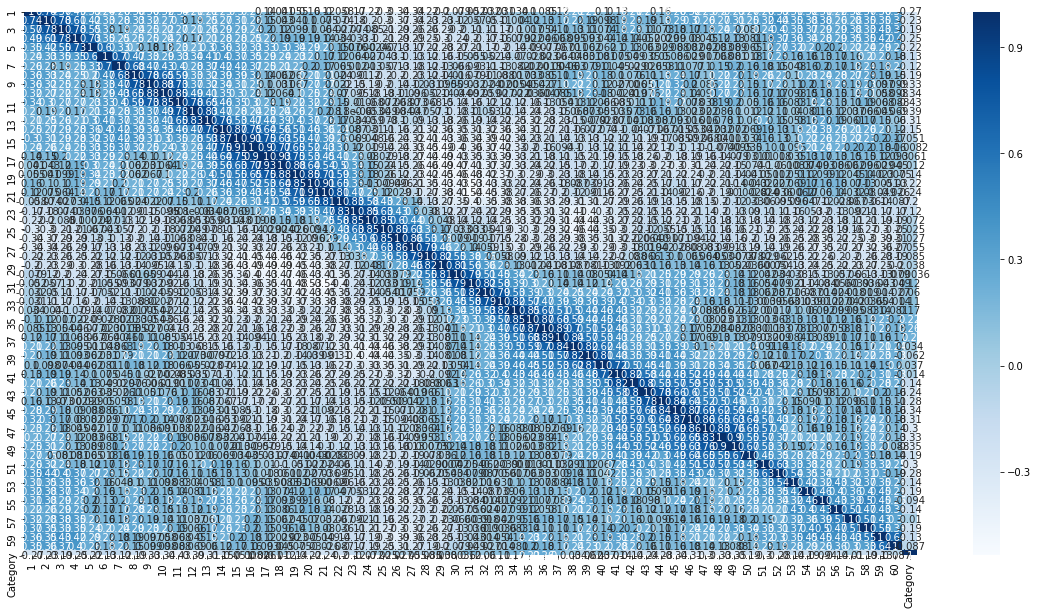

In [40]:
plt.figure(figsize = (20,10))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

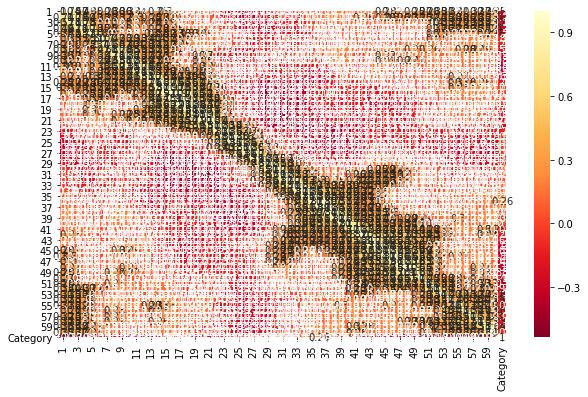

In [41]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

In [42]:
collist=df.columns.values
ncol=15
nrows=15

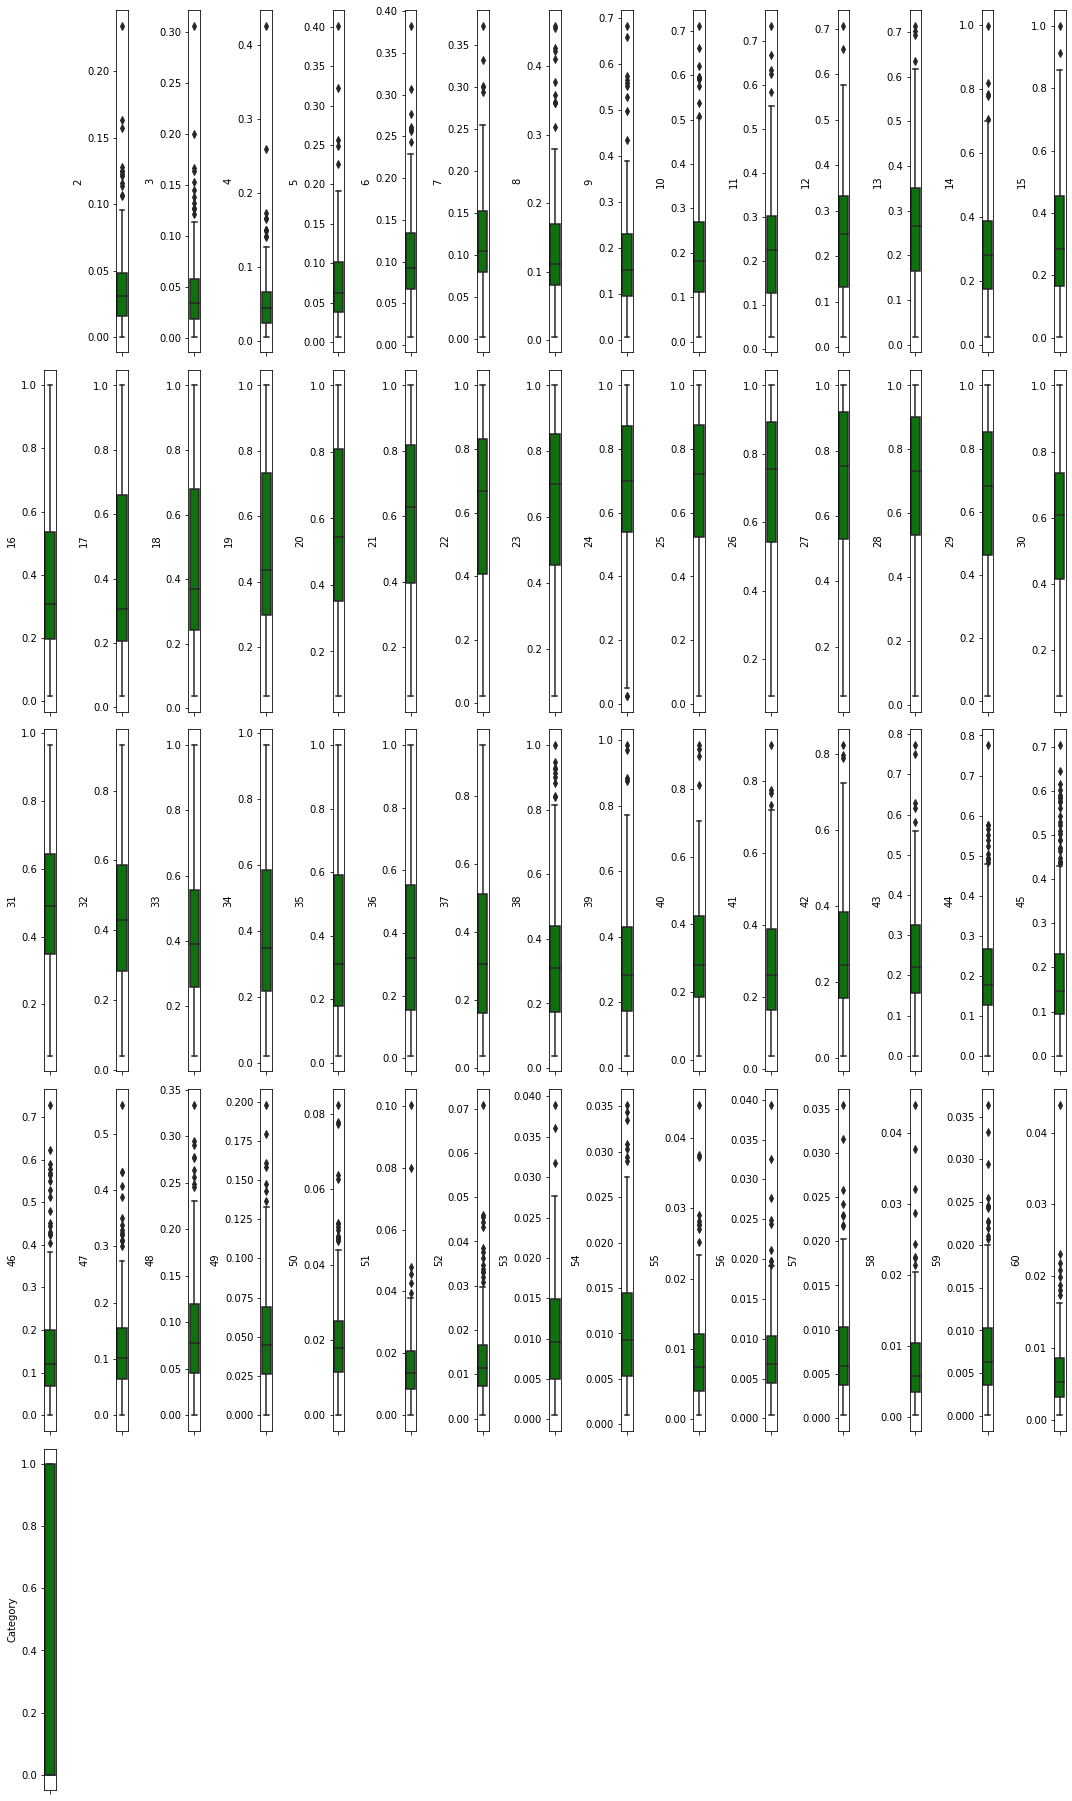

In [43]:
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

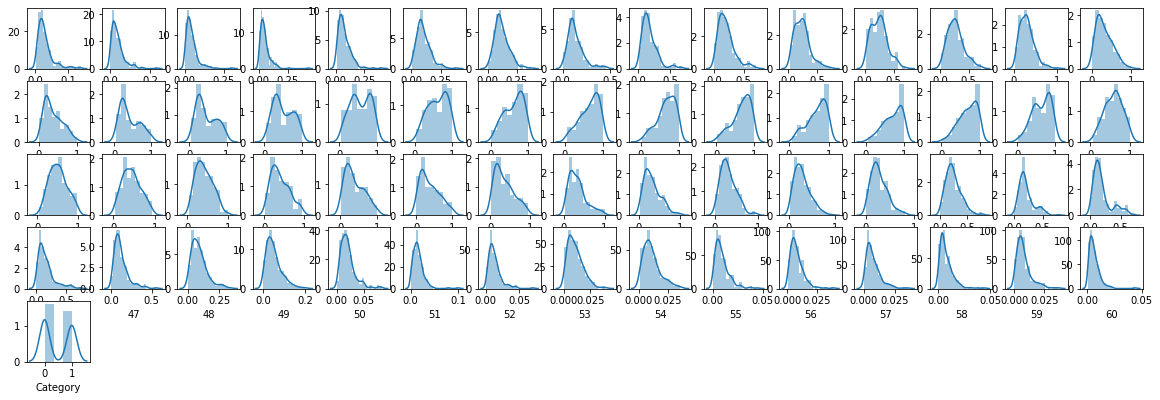

In [44]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [45]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.70018948, 0.42042142, 1.0529498 , ..., 0.44268846, 0.42246083,
        1.07529066],
       [0.13089402, 0.59942737, 1.71912994, ..., 0.25299833, 0.25405324,
        1.07529066],
       [0.83579208, 0.64754631, 0.48045125, ..., 0.63683361, 1.03005467,
        1.07529066],
       ...,
       [1.00042384, 0.15949749, 0.67235266, ..., 0.0382194 , 0.68112798,
        0.92998111],
       [0.0475061 , 0.09535845, 0.13434985, ..., 0.70154866, 0.34287094,
        0.92998111],
       [0.13959647, 0.06501846, 0.78685237, ..., 0.2970796 , 0.99025973,
        0.92998111]])

In [46]:
threshold = 3
print(np.where(z>3))

(array([  1,   1,   1,   1,   2,   2,   4,   4,  18,  18,  19,  20,  21,
        21,  21,  21,  21,  21,  21,  21,  32,  43,  43,  43,  64,  84,
        84,  86,  90,  90,  96,  96,  97,  97,  97,  97,  97,  97, 100,
       100, 104, 110, 110, 110, 111, 126, 126, 126, 128, 128, 128, 130,
       131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134,
       135, 135, 135, 135, 136, 136, 137, 137, 137, 139, 139, 139, 139,
       139, 140, 140, 141, 141, 141, 142, 142, 142, 143, 144, 144, 145,
       145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146,
       146, 146, 146, 160, 183, 185, 185, 185], dtype=int64), array([ 8,  9, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41, 46,
       47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,  1,
        2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12, 53,
        0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,  8,
       51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 45, 59, 53

In [47]:
df_new=df[((z<3).all(axis=1))]

In [48]:
df_new

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Category
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [49]:
df.shape

(207, 61)

In [50]:
x = df_new.iloc[:,0:-1]
x.shape

(167, 60)

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components = 10)

In [54]:
y = df_new.iloc[:,-1]

In [55]:
y

0      1
3      1
5      1
6      1
7      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: Category, Length: 167, dtype: int32

In [56]:
x = pca.fit_transform(x)

In [57]:
x.shape

(167, 10)

In [58]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [59]:
x = scale.fit_transform(x)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [61]:
x_train.shape

(111, 10)

In [62]:
y_train.shape

(111,)

In [63]:
x_test.shape

(56, 10)

In [64]:
y_test.shape

(56,)

In [65]:
lg = LogisticRegression()

In [66]:
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1]
accuracy_score: 0.8571428571428571
[[22  5]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.84      0.90      0.87        29

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.86      0.86      0.86        56



In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.625
[[18  9]
 [12 17]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        27
           1       0.65      0.59      0.62        29

    accuracy                           0.62        56
   macro avg       0.63      0.63      0.62        56
weighted avg       0.63      0.62      0.62        56



In [69]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

actual and predicted value score 0.8214285714285714
[[24  3]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.88      0.76      0.81        29

    accuracy                           0.82        56
   macro avg       0.83      0.82      0.82        56
weighted avg       0.83      0.82      0.82        56



In [70]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train,y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.6964285714285714
[[23  4]
 [13 16]]
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        27
           1       0.80      0.55      0.65        29

    accuracy                           0.70        56
   macro avg       0.72      0.70      0.69        56
weighted avg       0.72      0.70      0.69        56



In [71]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddct = dct.predict(x_test)
preddct
print('accuracy_score',accuracy_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 0.7142857142857143
[[24  3]
 [13 16]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        27
           1       0.84      0.55      0.67        29

    accuracy                           0.71        56
   macro avg       0.75      0.72      0.71        56
weighted avg       0.75      0.71      0.71        56

